In [1]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/_scripts")

from copy import deepcopy
from pprint import pprint

import numpy as np
import plotly.express as px
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

from aenum import Enum
from munch import Munch
from ladybug.dt import Time

from case_edits.ezcase import EzCase
from recipes.exp_02 import input, ns_axis, ns_axis_shaded
from outputs.variables import OutputVars as ov
from analysis.bar_plot import BarPlotAnalysis

# from helpers.dynamic_outputs import DynamicOutputVariables

In [2]:
qois = [ov.inside_face_convection_heat_gain, ov.inside_face_solar_radiation_heat_gain, ov.average_face_conduction_heat_transfer]
qoi_names = ["conv", "solar", "cond"]

#  ov.inside_face_solar_radiation_heat_gain

In [3]:
input.output_variables.extend(qois)

input2 = deepcopy(input)
input2.case_name = "tests/test19_ns_windows"
ez2 = EzCase(ns_axis(input2), RUN_CASE=True)

tests/test19_ns_windows
Added 4 walls 
Added 6 walls 
Added 4 walls 
Added 4 walls 
Added 6 walls 
Added 4 walls 
out.idf exists
IDF has changed: False
idf has not changed - no run
looking for sql


In [4]:
ez2.show_base_plot()

In [5]:
bp = BarPlotAnalysis(ez2, qois, plot_type=1, qoi_names=qoi_names)
bp.run()

In [6]:
bp.df

,room,qoi,time,value
0,B_01,conv,2017-07-01 00:00:00,-19.398883
1,B_01,conv,2017-07-01 00:15:00,-19.888040
2,B_01,conv,2017-07-01 00:30:00,-21.514493
3,B_01,conv,2017-07-01 00:45:00,-23.959326
4,B_01,conv,2017-07-01 01:00:00,-25.809029
...,...,...,...,...
1723,B_06,cond,2017-07-01 22:45:00,-37.744744
1724,B_06,cond,2017-07-01 23:00:00,-36.337791
1725,B_06,cond,2017-07-01 23:15:00,-35.085311
1726,B_06,cond,2017-07-01 23:30:00,-33.947865


In [7]:
sns.set_theme()

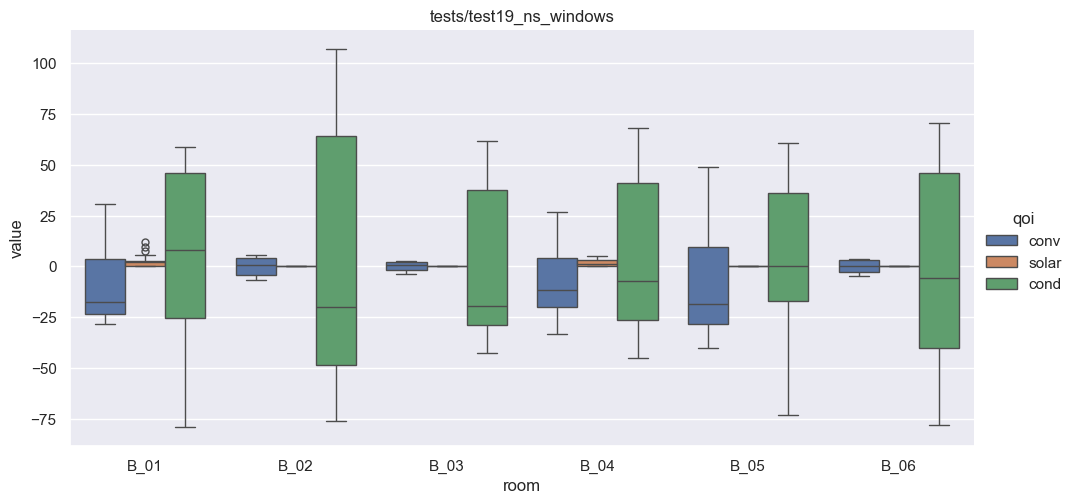

In [8]:
f = sns.catplot(
    data=bp.df, x="room", y="value", hue="qoi", kind="box", height=5, aspect=2
).set(title=bp.case_name)



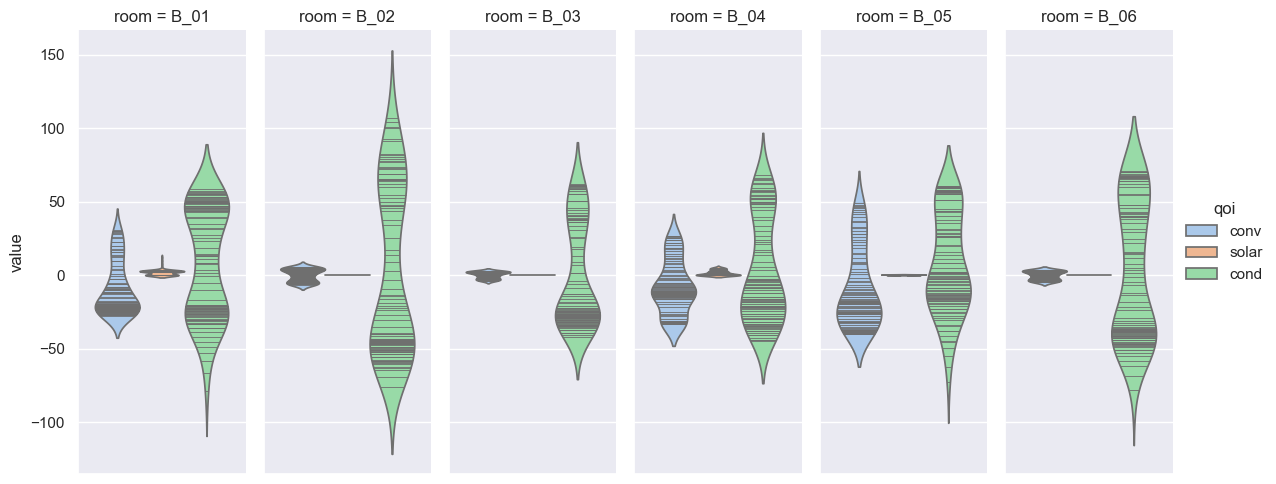

In [9]:
f = sns.catplot(
    data=bp.df,  y="value", hue="qoi", kind="violin", height=5, aspect=0.4, palette="pastel", density_norm="width", col="room", inner="stick"
)

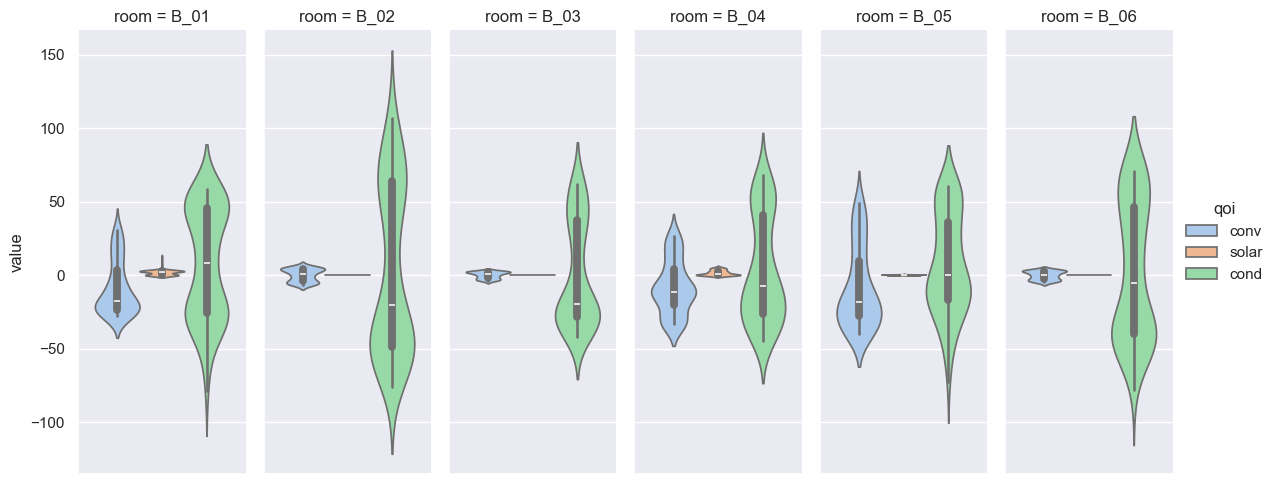

In [10]:
f = sns.catplot(
    data=bp.df,  y="value", hue="qoi", kind="violin", height=5, aspect=0.4, palette="pastel", density_norm="width", col="room"
)

## shades

In [11]:
input.output_variables.extend(qois)

input3 = deepcopy(input)
input3.case_name = "tests/test20_ns_shaded"
ez3 = EzCase(ns_axis_shaded(input3), RUN_CASE=True)

tests/test20_ns_shaded
Added 4 walls 
Added 6 walls 
Added 4 walls 
Added 4 walls 
Added 6 walls 
Added 4 walls 
`Surface Inside Face Convection Heat Gain Rate per Area` is already in IDF
`Surface Inside Face Solar Radiation Heat Gain Rate per Area` is already in IDF
`Surface Average Face Conduction Heat Transfer Rate per Area` is already in IDF
out.idf exists
IDF has changed: True
idf has changed - running case

/Applications/EnergyPlus-22-2-0/energyplus --weather /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/weather_data/PALO_ALTO/CA_PALO-ALTO-AP_724937_23.EPW --output-directory /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/tests/test20_ns_shaded/results --idd /Applications/EnergyPlus-22-2-0/Energy+.idd /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/base/01example/Minimal_AP_e10dce.idf

EnergyPlus Starting
EnergyPlus, Version 22.2.0-c249759bad, YMD=2024.08.15 10:39
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initiali

EnergyPlus Completed Successfully.


In [12]:
bp = BarPlotAnalysis(ez3, qois, plot_type=1, qoi_names=qoi_names)
bp.run()

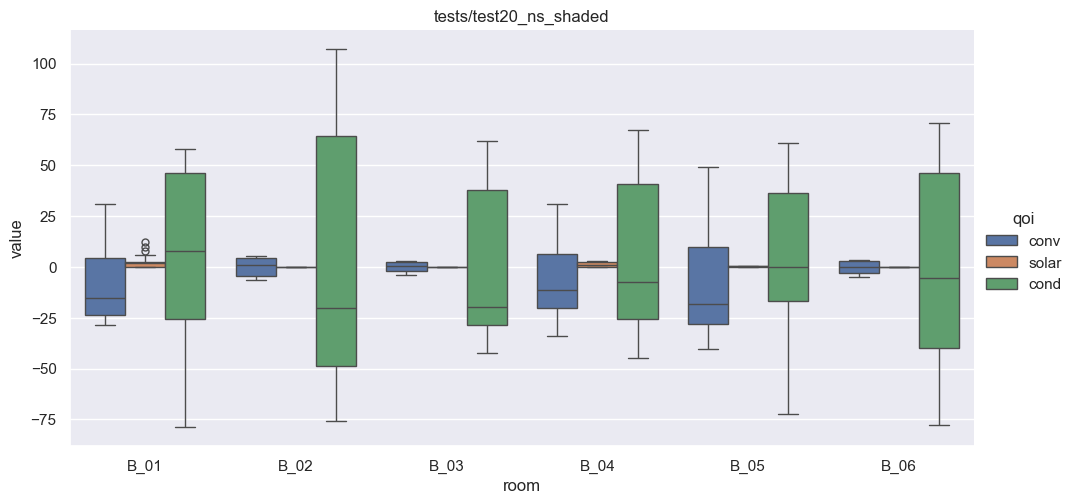

In [13]:
f = sns.catplot(
    data=bp.df, x="room", y="value", hue="qoi", kind="box", height=5, aspect=2
).set(title=bp.case_name)